In [1]:
%pylab inline
from astropy.io import fits
import astropy.units as u
import pickle as pickle
import os as os
import pandas as pd

from spectools_ir.utils import extract_hitran_data, spec_convol, make_rotation_diagram, get_molmass
from spectools_ir.utils import compute_thermal_velocity, sigma_to_fwhm, fwhm_to_sigma, wn_to_k, spec_convol_R
from spectools_ir.utils import get_miri_mrs_resolution, get_miri_mrs_wavelengths, make_miri_mrs_figure

from spectools_ir.flux_calculator import calc_fluxes, make_lineshape

from spectools_ir.slabspec import make_spec

from spectools_ir.slab_fitter import Config, LineData,Retrieval
from spectools_ir.slab_fitter import corner_plot, trace_plot, find_best_fit, compute_model_fluxes
from spectools_ir.slab_fitter import calc_solid_angle, calc_radius
from spectools_ir.slab_fitter import read_data_from_file, get_samples

Populating the interactive namespace from numpy and matplotlib


In [2]:
import spectools_ir
spectools_ir.__file__

'C:\\Users\\ksn70\\python\\lib\\site-packages\\spectools_ir\\__init__.py'

get hitran data

In [4]:
hitran_data=extract_hitran_data('CO',4.58,5.2,vup=1)  

Read in disk data and plot

In [5]:
infile='nirspec_drtau.dat'

wave , flux = np.loadtxt(infile, unpack=True, skiprows=21)
print(wave,flux)

[4.6492472 4.6493402 4.6494331 ... 5.0999174 5.1000195 5.1001215] [1.3894759 1.5901209 1.7907699 ...       nan       nan       nan]


Text(0, 0.5, 'Flux [Jy]')

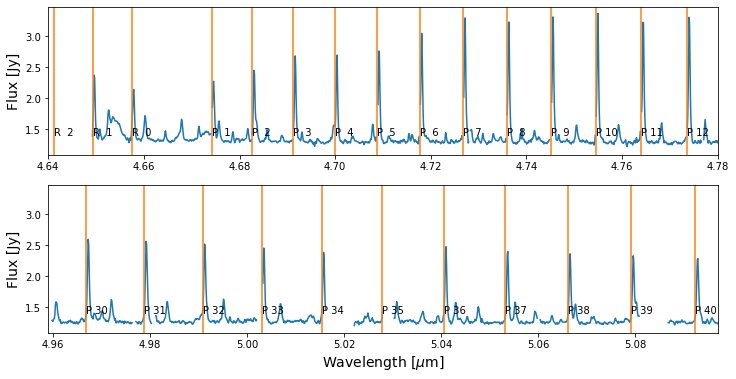

In [6]:
#Plot spectrum.
#The wavelength gap between the two plots is due to a section of poor atmosphere observations

fig=plt.figure(figsize=(12,6))

ax1=fig.add_subplot(211)
ax1.plot(wave,flux)
ax1.set_xlim(4.64,4.78) #first half of wavelength range 
for i,mywave in enumerate(hitran_data['wave']):
    if( (mywave>4.64) & (mywave<4.78) ):
        ax1.axvline(mywave,color='C1')
        ax1.text(hitran_data['wave'][i],1.4,hitran_data['Qpp'][i].strip())
ax1.set_ylabel('Flux [Jy]',fontsize=14)

ax2=fig.add_subplot(212)
ax2.plot(wave,flux)
ax2.set_xlim(4.959,5.097) #second half of wavelength range 
for i,mywave in enumerate(hitran_data['wave']):
    if( (mywave>4.959) & (mywave<5.097) ):
        ax2.axvline(mywave,color='C1')
        ax2.text(hitran_data['wave'][i],1.4,hitran_data['Qpp'][i].strip())
ax2.set_xlabel('Wavelength [$\mu$m]',fontsize=14)
ax2.set_ylabel('Flux [Jy]',fontsize=14)

Not enough data near  5.189127223824972  microns. Skipping.
Not enough data near  5.174903558192924  microns. Skipping.
Not enough data near  5.160832968521178  microns. Skipping.
Not enough data near  5.146914024193281  microns. Skipping.
Not enough data near  5.133145294592781  microns. Skipping.
Not enough data near  5.119525349103228  microns. Skipping.
Not enough data near  5.106053233980321  microns. Skipping.


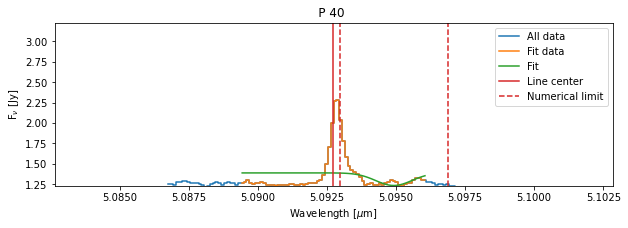

Is this fit okay? [y or n]n


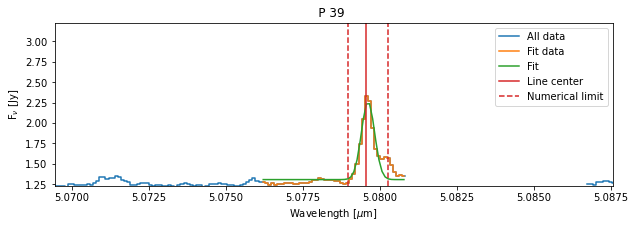

Is this fit okay? [y or n]y


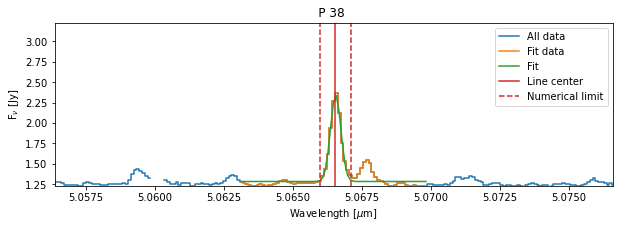

Is this fit okay? [y or n]y


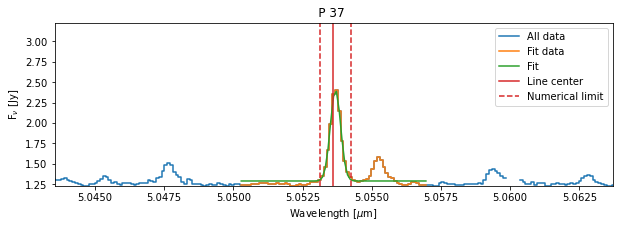

Is this fit okay? [y or n]y


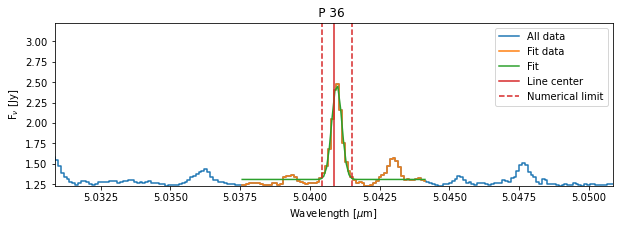

Is this fit okay? [y or n]y


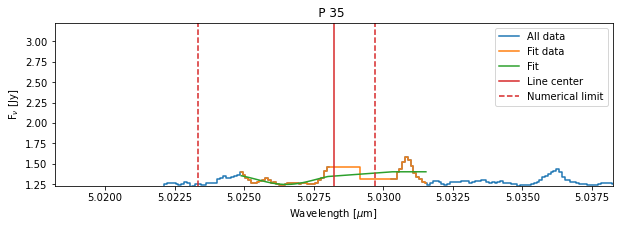

Is this fit okay? [y or n]n


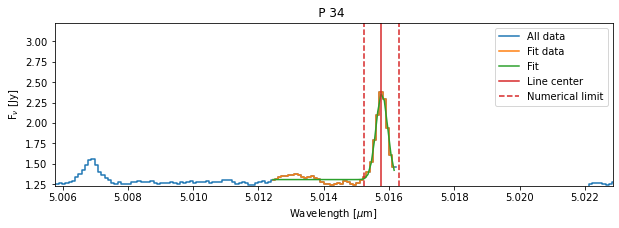

Is this fit okay? [y or n]y


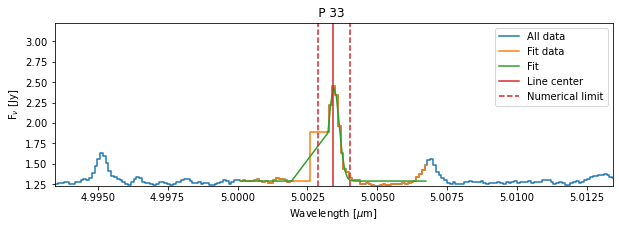

Is this fit okay? [y or n]y


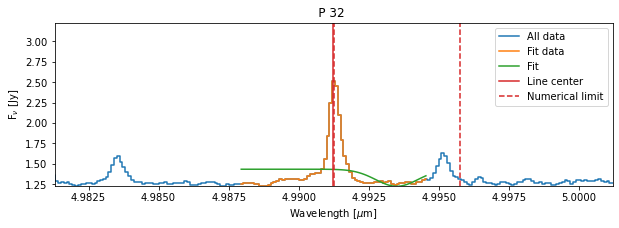

Is this fit okay? [y or n]n


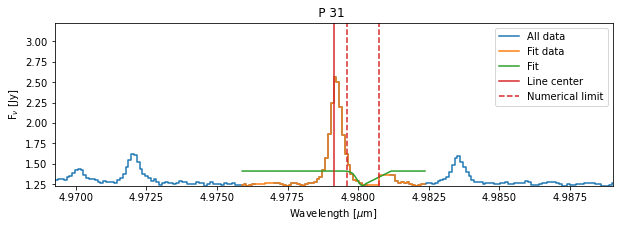

Is this fit okay? [y or n]n


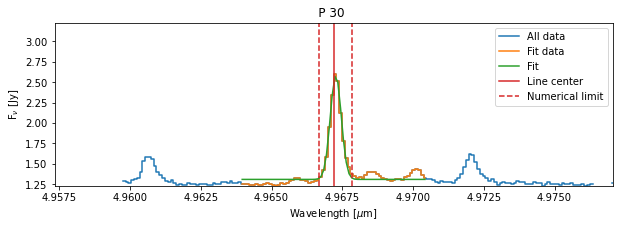

Is this fit okay? [y or n]y
Not enough data near  4.955399784204067  microns. Skipping.
Not enough data near  4.943725477088429  microns. Skipping.
Not enough data near  4.932181356069869  microns. Skipping.
Not enough data near  4.920766467404086  microns. Skipping.
Not enough data near  4.909479380474628  microns. Skipping.
Not enough data near  4.898319141537196  microns. Skipping.
Not enough data near  4.887284796847487  microns. Skipping.
Not enough data near  4.876374915789051  microns. Skipping.
Not enough data near  4.865589021489737  microns. Skipping.
Not enough data near  4.854926160205244  microns. Skipping.
Not enough data near  4.8443849013191205  microns. Skipping.
Not enough data near  4.833965244831367  microns. Skipping.
Not enough data near  4.82366480638123  microns. Skipping.
Not enough data near  4.813484062840862  microns. Skipping.
Not enough data near  4.80342158359381  microns. Skipping.
Not enough data near  4.793475461151472  microns. Skipping.
Not enough da

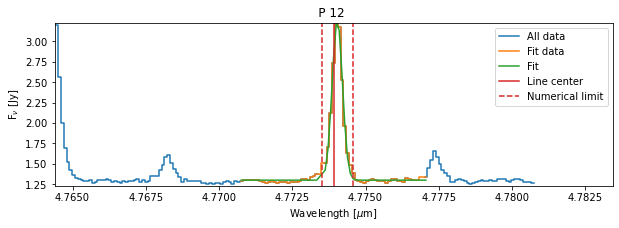

Is this fit okay? [y or n]y


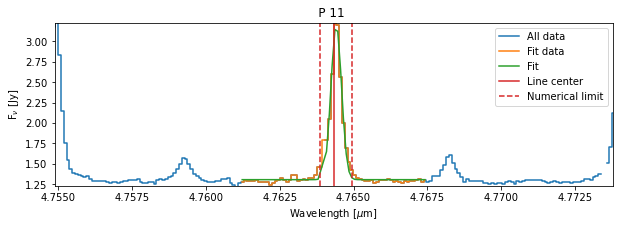

Is this fit okay? [y or n]y


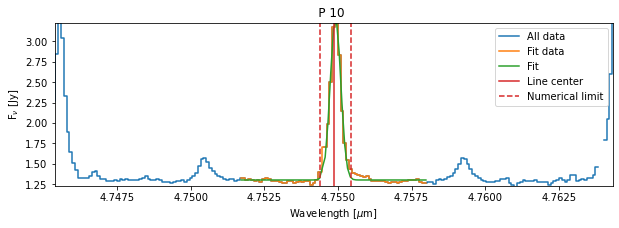

Is this fit okay? [y or n]y


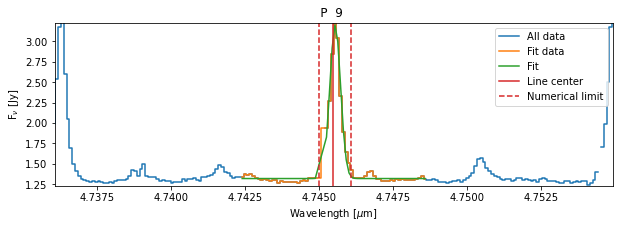

Is this fit okay? [y or n]y


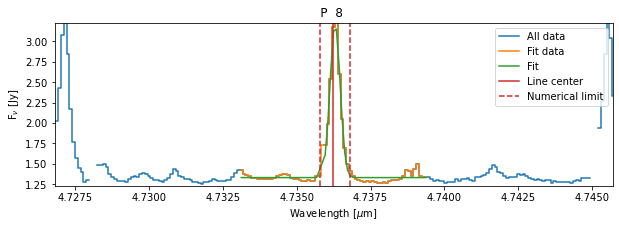

Is this fit okay? [y or n]y


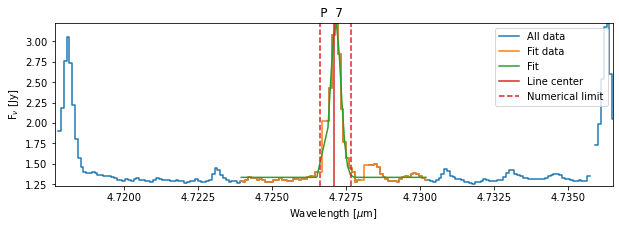

Is this fit okay? [y or n]y


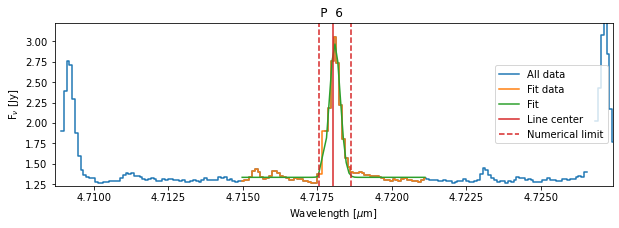

Is this fit okay? [y or n]y


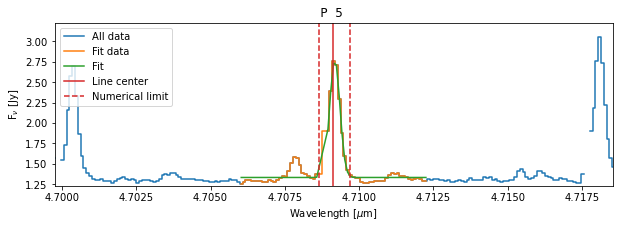

Is this fit okay? [y or n]y


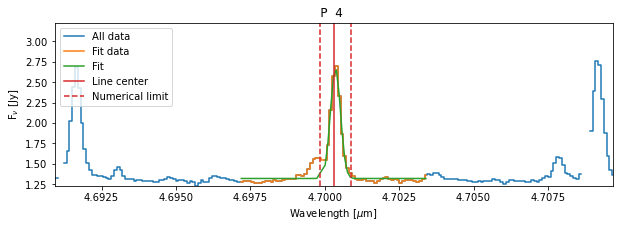

Is this fit okay? [y or n]y


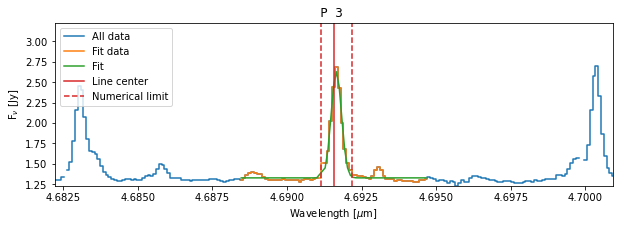

Is this fit okay? [y or n]y


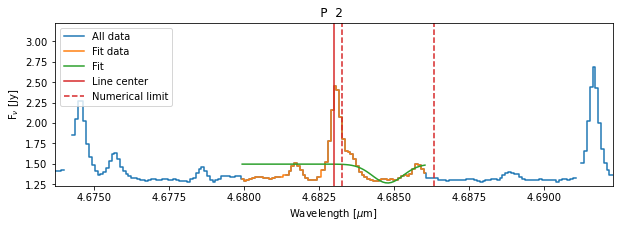

Is this fit okay? [y or n]n


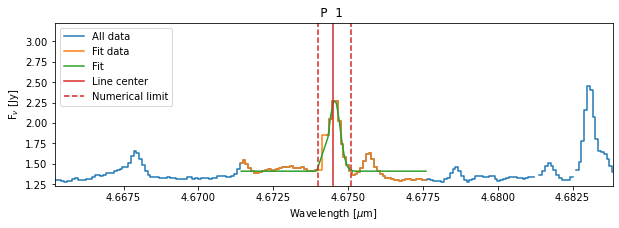

Is this fit okay? [y or n]y


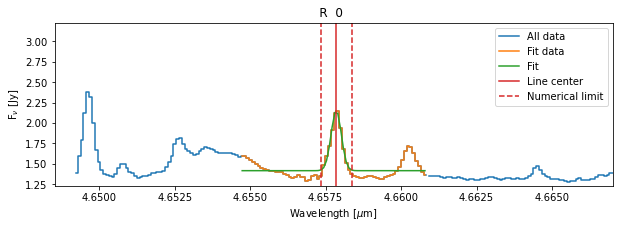

Is this fit okay? [y or n]n


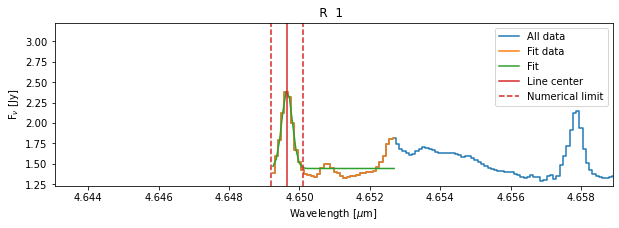

Is this fit okay? [y or n]n
Not enough data near  4.641582620656148  microns. Skipping.
Not enough data near  4.63361647138256  microns. Skipping.
Not enough data near  4.625754280237772  microns. Skipping.
Not enough data near  4.617994616605336  microns. Skipping.
Not enough data near  4.6103370036131  microns. Skipping.
Not enough data near  4.602781441261065  microns. Skipping.
Not enough data near  4.595326975804929  microns. Skipping.
Not enough data near  4.587972653500392  microns. Skipping.
Not enough data near  4.580718474347454  microns. Skipping.


In [7]:
#Calculate fluxes.
lineflux_data=calc_fluxes(wave,flux,hitran_data, v_dop=22,fwhm_v=40.,sep_v=200.,cont=1.05,vet_fits=True, plot=True)
pickle.dump(lineflux_data,open('lineflux_data.p','wb')) #save for convenience

lineflux_data=pickle.load(open('lineflux_data.p','rb'))  #restore lineflux_data if you don't want to re-run

In [12]:
lineflux_data

molec_id,local_iso_id,wn,a,elower,Vp_HITRAN,Vpp_HITRAN,Qp_HITRAN,Qpp_HITRAN,gup,glow,nu,eup_k,wave,lineflux,lineflux_Gaussian,lineflux_err,linewidth,linewidth_err,v_dop_fit,v_dop_fit_err,continuum,continuum_err
,,,,,,,,,,,,,,W / m2,,W / m2,km / s,km / s,km / s,km / s,Jy,Jy
int32,int32,float32,float32,float32,bytes15,bytes15,bytes15,bytes15,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64
5,1,1968.8247,13.78,2984.2708,1,0,,P 39,77.0,79.0,59023880000000.0,7126.399,5.079172,6.222449054431597e-17,5.968681503389501e-17,4.883144673922994e-18,29.81422938671461,1.9639311917102034,25.898060485881373,0.7924331363951216,1.3046648739237154,0.013871729826430224
5,1,1973.8915,13.89,2835.7627,1,0,,P 38,75.0,77.0,59175780000000.0,6920.019,5.0661345,5.978154070819105e-17,5.857949013964014e-17,3.751671644764693e-18,26.272141059739585,1.3898490691721914,24.472252041230647,0.5738053616974452,1.281349731451778,0.009275548201297447
5,1,1978.9287,13.99,2690.9912,1,0,,P 37,73.0,75.0,59326790000000.0,6718.9727,5.0532393,6.209544915027458e-17,6.135164168939763e-17,3.943677719523291e-18,26.139006808695125,1.3910165774116503,26.66390755781329,0.5744993479321926,1.2875362884488317,0.009770759573095953
5,1,1983.9363,14.09,2549.962,1,0,,P 36,71.0,73.0,59476917000000.0,6523.2676,5.0404844,6.237135376961981e-17,6.173027375809239e-17,3.858707190497287e-18,25.089997203664243,1.3249726588755044,28.53071510036933,0.547691293142781,1.3063008143717127,0.0099926134071811
5,1,1993.8622,14.31,2279.1511,1,0,,P 34,67.0,69.0,59774486000000.0,6147.9116,5.015392,5.687735503389599e-17,5.663990847381613e-17,2.1829947792923707e-18,25.14619820317163,0.8604923149963396,23.305481423816083,0.346939034320363,1.3048447442450746,0.008001294940527256
5,1,1998.7802,14.42,2149.38,1,0,,P 33,65.0,67.0,59921924000000.0,5968.276,5.0030513,6.024414439485942e-17,6.445709856262312e-17,2.5063928152123774e-18,26.2947807745827,1.0337837576844275,23.864376660194665,0.386934186714924,1.2865820019266105,0.006750904197882068
5,1,2013.3524,14.75,1782.6624,1,0,,P 30,59.0,61.0,60358790000000.0,5461.6177,4.9668403,7.656440864164399e-17,7.546194791752948e-17,3.0290820047870848e-18,27.598021964443223,0.8954968105334256,25.96751534519899,0.36875571374567884,1.3069454523288684,0.007086596506720968
5,1,2094.8623,17.0,299.7656,1,0,,P 12,23.0,25.0,62802390000000.0,3445.335,4.7735834,1.1533694528319744e-16,1.1377204756038116e-16,2.05091307960924e-18,26.033294876862037,0.3919835230408918,28.390971967459482,0.16148485619549482,1.2977880686885934,0.005087479250178359


Text(0, 0.5, 'Line flux [10$^{-16}$ W m$^{-2}$]')

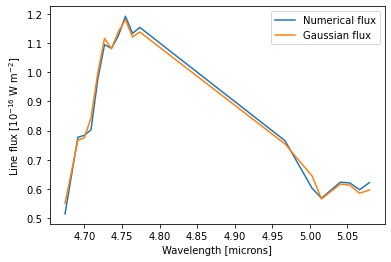

In [13]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(lineflux_data['wave'],lineflux_data['lineflux']*1e16, label='Numerical flux')
ax1.plot(lineflux_data['wave'],lineflux_data['lineflux_Gaussian']*1e16 ,label='Gaussian flux')
ax1.legend()
ax1.set_xlabel('Wavelength [microns]')
ax1.set_ylabel(r'Line flux [10$^{-16}$ W m$^{-2}$]')

### Creating "composite lineshape" with info from flux_calculator output

In [15]:
lineshape_data=make_lineshape(wave,flux,lineflux_data)

Text(0, 0.5, 'Arbitrary flux')

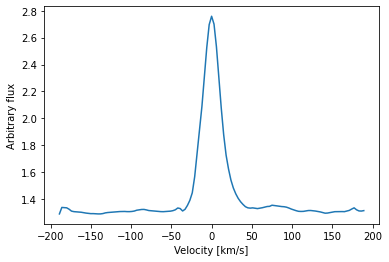

In [16]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(lineshape_data[0],lineshape_data[1])

ax1.set_xlabel('Velocity [km/s]')
ax1.set_ylabel('Arbitrary flux')

### "Display resultant fluxes in a rotation diagram"

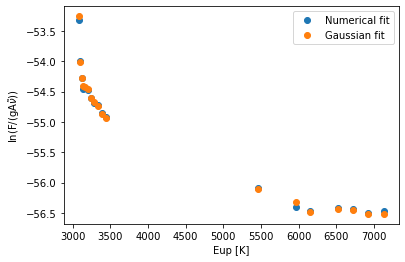

In [17]:
rot_numerical=make_rotation_diagram(lineflux_data,fluxkey='lineflux')
rot_Gaussian=make_rotation_diagram(lineflux_data,fluxkey='lineflux_Gaussian')

fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(rot_numerical['x'],rot_numerical['y'],'C0o',label='Numerical fit')
ax1.plot(rot_Gaussian['x'],rot_Gaussian['y'],'C1o', label='Gaussian fit')

ax1.set_xlabel('Eup [K]')
ax1.set_ylabel(r'ln(F/(gA$\tilde{\nu}$))')
ax1.legend()

### Slabspec

In [34]:
au=1.5e11
#Make slab model
#This can take a few seconds to run.  It is primarily limited by the convolution time.
model_output=make_spec('CO',1e22,1000,np.pi*(0.3*au)**2., wmin=4.64,wmax=5.1,convol_fwhm=30.,d_pc=140.,res=1e-5,vup=1)

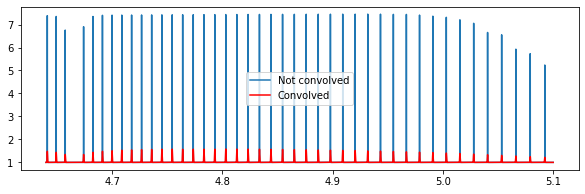

In [35]:
#Plot slab model
fig=plt.figure(figsize=(10,3))
ax1=fig.add_subplot(111)
ax1.plot(model_output['spectrum']['wave'],model_output['spectrum']['flux']+1,label='Not convolved')
ax1.plot(model_output['spectrum']['wave'],model_output['spectrum']['convolflux']+1,'r',label='Convolved')
ax1.legend()

### Output model as rotation diagram

In [36]:
rd_model=make_rotation_diagram(model_output['lineparams'])
rd_data=make_rotation_diagram(lineflux_data)

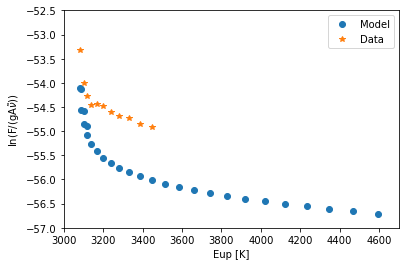

In [37]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(rd_model['x'],rd_model['y'],' C0o',label='Model')
ax1.plot(rd_data['x'],rd_data['y'],' C1*',label='Data')
ax1.set_xlabel('Eup [K]')
ax1.set_ylabel(r'ln(F/(gA$\tilde{\nu}$))')
ax1.set_xlim(3000,4700)
ax1.set_ylim(-57,-52.5)
ax1.legend()

### Slab_fitter

In [38]:
myconfig=Config()  #reads config.json by default, or can specify path to file as input parameter
myconfig.display()

data=lineflux_data

mydata=LineData(data)
myretrieval=Retrieval(myconfig,mydata)

{
 "tmin": 100,
 "tmax": 2000,
 "lognmin": 19,
 "lognmax": 24,
 "logomegamin": -19,
 "logomegamax": -12,
 "Nwalkers": 20,
 "Nburnin": 1000,
 "Nsamples": 3000
}


### Run Retrieval

In [28]:
mychain=myretrieval.run_emcee()  #Run retrieval.  May take a while, depending on number of samples
pickle.dump(mychain,open('test_chain.p','wb'))  #Save for convenience and later retrieval
os.system('afplay /System/Library/Sounds/Sosumi.aiff')

mychain=pickle.load(open('test_chain.p','rb'))  
postsamples=get_samples(mychain,myconfig.getpar('Nburnin'))  #Get list of samples, after removing burnin, from chain

Number of total samples: 60000
Run time [s]: 177.19179034233093


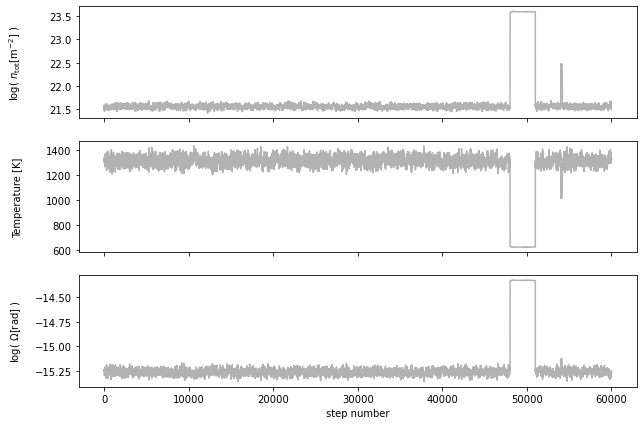

In [29]:
#Trace plot - examine samples
trace_plot(postsamples)

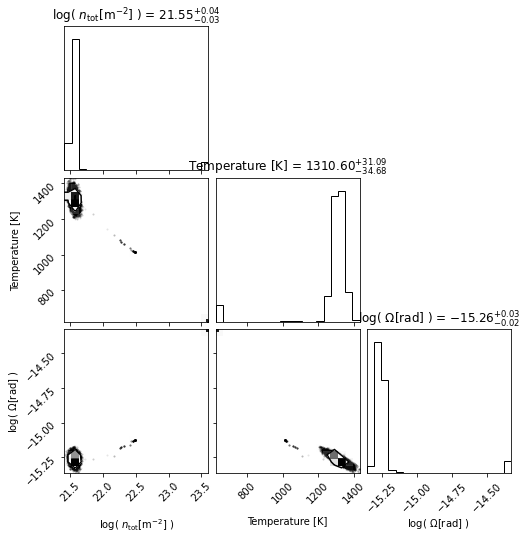

In [30]:
#Corner plot - see posterior distributions
fig=corner_plot(postsamples)

In [31]:
#Best fit parameters - best fit parameters plus/minus 1-sigma intervals
best_fit=find_best_fit(postsamples,show=True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

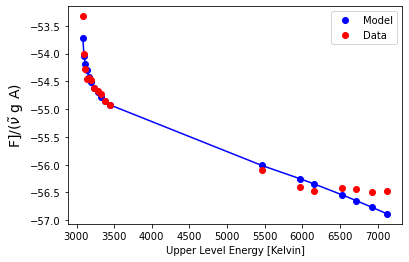

In [32]:
#Rotation diagram
modelflux=compute_model_fluxes(mydata,postsamples) #Compute model fluxes for ecah line in data
rotdiag=mydata.rot_diagram(modelfluxes=modelflux,units='mks') #Rotation diagram for data and model

fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.plot(rotdiag['x'],rotdiag['modely'],'bo',label='Model')
ax1.plot(rotdiag['x'],rotdiag['modely'],'b',label='_None_')
ax1.plot(rotdiag['x'],rotdiag['y'],'ro',label='Data')

ax1.set_xlabel('Upper Level Energy [Kelvin]')
#ax1.set_ylabel(r'F[W m$^{-2}$]/($\~{\nu}$ [m$^{-1}$]g A[s$^{-1}$])',fontsize=14)
ax1.set_ylabel(r'F]/($\~{\nu}$ g A)',fontsize=14)
ax1.legend()

In [33]:
!cat 'slab_fitter_input.txt'

data=read_data_from_file('slab_fitter_input.txt')

'cat' is not recognized as an internal or external command,
operable program or batch file.


FileNotFoundError: [Errno 2] No such file or directory: 'slab_fitter_input.txt'